In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import colormaps

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder



In [2]:
defects_df=pd.read_csv("/content/defects_data.csv")

In [3]:
defects_df.head(11)

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost
0,1,15,Structural,6/6/2024,Component,Minor,Visual Inspection,245.47
1,2,6,Functional,4/26/2024,Component,Minor,Visual Inspection,26.87
2,3,84,Structural,2/15/2024,Internal,Minor,Automated Testing,835.81
3,4,10,Functional,3/28/2024,Internal,Critical,Automated Testing,444.47
4,5,14,Cosmetic,4/26/2024,Component,Minor,Manual Testing,823.64
5,6,17,Functional,5/11/2024,Internal,Moderate,Visual Inspection,788.11
6,7,85,Cosmetic,5/23/2024,Internal,Critical,Manual Testing,33.68
7,8,90,Structural,1/15/2024,Internal,Moderate,Manual Testing,65.56
8,9,30,Structural,1/26/2024,Component,Critical,Manual Testing,848.61
9,10,20,Structural,6/5/2024,Component,Critical,Visual Inspection,478.48


In [4]:
defects_df.shape

(1000, 8)

In [5]:
defects_df.describe()

,defect_id,product_id,repair_cost
count,1000.000000,1000.000000,1000.000000
mean,500.500000,50.837000,507.627150
std,288.819436,29.480935,289.623615
min,1.000000,1.000000,10.220000
25%,250.750000,26.000000,270.902500
50%,500.500000,51.000000,506.430000
75%,750.250000,77.000000,759.065000
max,1000.000000,100.000000,999.640000


In [6]:
defects_df.isnull().sum()

,0
defect_id,0
product_id,0
defect_type,0
defect_date,0
defect_location,0
severity,0
inspection_method,0
repair_cost,0


In [7]:
# preprocessing date

In [8]:
defects_df["defect_date"] = pd.to_datetime(defects_df["defect_date"])

In [9]:
print((defects_df["defect_date"].dtype))

datetime64[ns]


In [10]:
defects_df["defect_month"]=defects_df["defect_date"].dt.month_name()

In [11]:
defects_df.head(10)

,defect_id,product_id,defect_type,defect_date,defect_location,severity,inspection_method,repair_cost,defect_month
0,1,15,Structural,2024-06-06,Component,Minor,Visual Inspection,245.47,June
1,2,6,Functional,2024-04-26,Component,Minor,Visual Inspection,26.87,April
2,3,84,Structural,2024-02-15,Internal,Minor,Automated Testing,835.81,February
3,4,10,Functional,2024-03-28,Internal,Critical,Automated Testing,444.47,March
4,5,14,Cosmetic,2024-04-26,Component,Minor,Manual Testing,823.64,April
5,6,17,Functional,2024-05-11,Internal,Moderate,Visual Inspection,788.11,May
6,7,85,Cosmetic,2024-05-23,Internal,Critical,Manual Testing,33.68,May
7,8,90,Structural,2024-01-15,Internal,Moderate,Manual Testing,65.56,January
8,9,30,Structural,2024-01-26,Component,Critical,Manual Testing,848.61,January
9,10,20,Structural,2024-06-05,Component,Critical,Visual Inspection,478.48,June


/tmp/ipython-input-285715478.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=defects_df['defect_type'],ax=axes[0,0], palette="dark")
/tmp/ipython-input-285715478.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=defects_df["defect_location"],ax=axes[0,1], palette="dark")
/tmp/ipython-input-285715478.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=defects_df['inspection_method'],ax=axes[1,0], palette="dark" )
/tmp/ipython-input-285715478.py:53: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated a

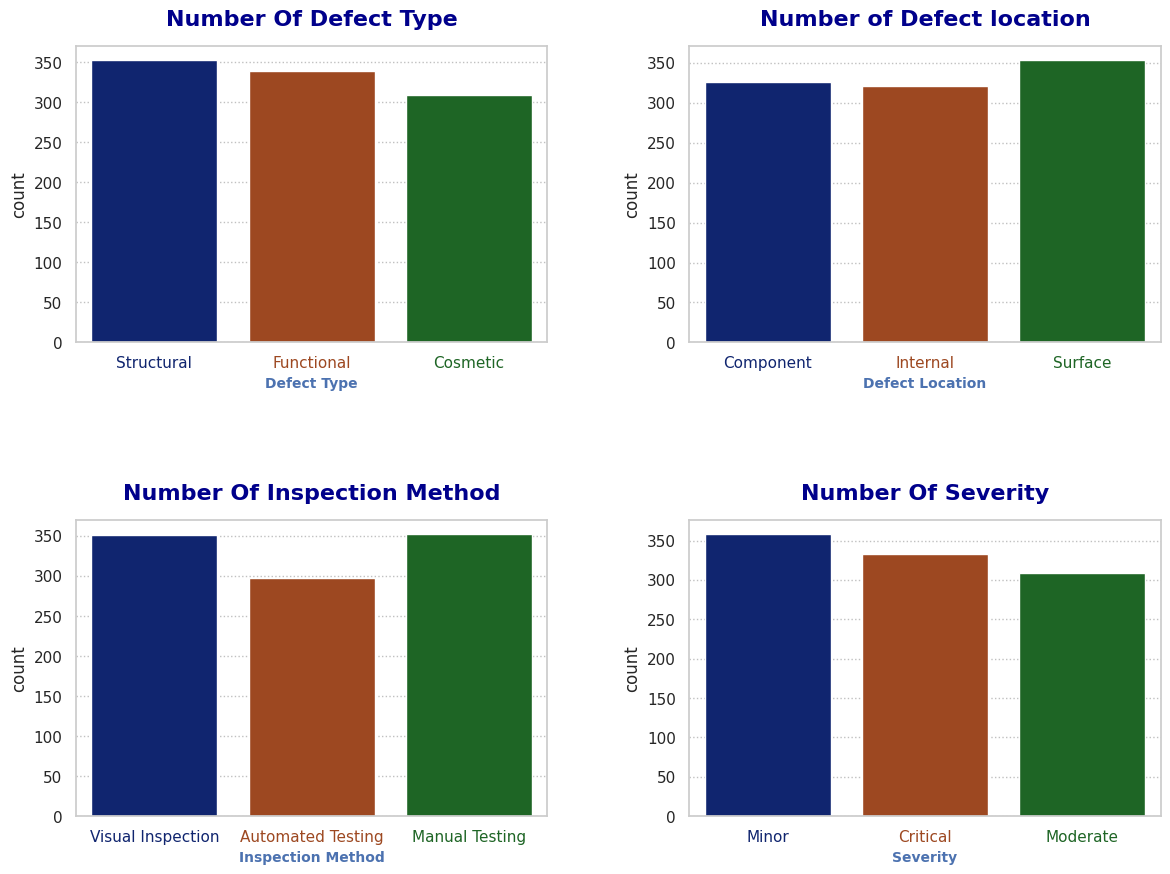

In [29]:
sns.set("notebook")
sns.set_style("whitegrid", { "grid.color": "silver", "grid.linestyle": ":"})

fig, axes=plt.subplots(2,2, figsize=(14,10) )
plt.subplots_adjust(hspace = 0.6, wspace=0.3)




#defect_type

sns.countplot(x=defects_df['defect_type'],ax=axes[0,0], palette="dark")
axes[0,0].set_title("Number Of Defect Type", fontdict={"fontsize": 16, "fontweight": "bold", "color": "darkblue"},  pad=15)
axes[0,0].set_xlabel("Defect Type", fontdict={"fontsize": 10, "fontweight": "bold", "color": "b"})

bars = axes[0,0].patches
xtick_labels = axes[0,0].get_xticklabels()

for bar, label in zip(bars, xtick_labels):
    label.set_color(bar.get_facecolor())


#defect_location

sns.countplot(x=defects_df["defect_location"],ax=axes[0,1], palette="dark")

axes[0,1].set_title("Number of Defect location", fontdict={"fontsize": 16, "fontweight": "bold", "color": "darkblue"},  pad=15)
axes[0,1].set_xlabel("Defect Location", fontdict={"fontsize": 10, "fontweight": "bold", "color": "b"})

bars = axes[0,1].patches
xtick_labels = axes[0,1].get_xticklabels()

for bar, label in zip(bars, xtick_labels):
    label.set_color(bar.get_facecolor())


#inspection_method

sns.countplot(x=defects_df['inspection_method'],ax=axes[1,0], palette="dark" )

axes[1,0].set_title("Number Of Inspection Method", fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'darkblue'},  pad=15)
axes[1,0].set_xlabel("Inspection Method", fontdict={'fontsize': 10, 'fontweight': 'bold', 'color': 'b'})

bars = axes[1,0].patches
xtick_labels = axes[1,0].get_xticklabels()

for bar, label in zip(bars, xtick_labels):
    label.set_color(bar.get_facecolor())


#severity

sns.countplot(x=defects_df['severity'],ax=axes[1,1], palette="dark")
axes[1,1].set_title("Number Of Severity", fontdict={'fontsize': 16, 'fontweight': 'bold', 'color': 'darkblue'}, pad=15)
axes[1,1].set_xlabel("Severity", fontdict={'fontsize': 10, 'fontweight': 'bold', 'color': 'b'})

bars = axes[1,1].patches
xtick_labels = axes[1,1].get_xticklabels()

for bar, label in zip(bars, xtick_labels):
    label.set_color(bar.get_facecolor())



plt.show()

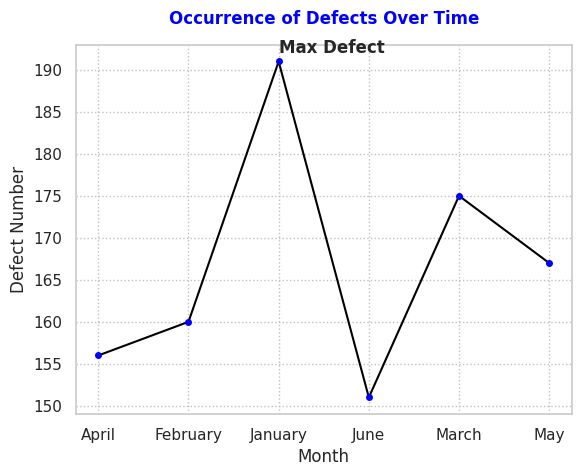

In [14]:
counts_defect = defects_df.groupby('defect_month').size()
counts_defect.index
counts_defect.values
counts_defect.count

max_defect=counts_defect.max()
max_index=counts_defect.idxmax()

plt.plot(counts_defect.index, counts_defect.values ,color='black' ,marker=".", markeredgecolor="blue" ,markerfacecolor="blue"
, markersize=8.)



plt.annotate("Max Defect", xy=(max_index, max_defect), xytext=(max_index , max_defect+1),fontweight="heavy"
             )

plt.xlabel("Month")
plt.ylabel("Defect Number")
plt.title("Occurrence of Defects Over Time" , fontweight="bold" , pad=15, color="blue")

plt.show()

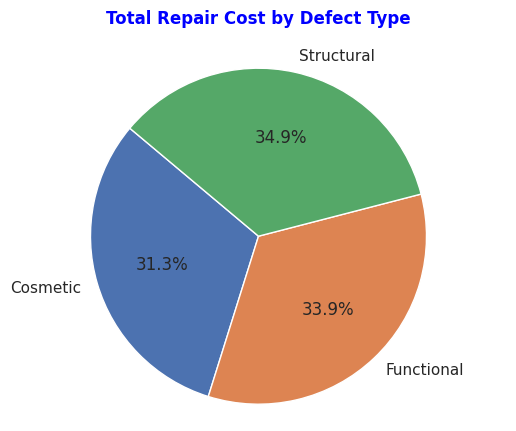

In [30]:
repair_sum_def_type = defects_df.groupby("defect_type")["repair_cost"].sum()


repair_sum_df = repair_sum_def_type.reset_index()


plt.plot(figsize=(5, 5))

plt.pie(repair_sum_def_type, labels=repair_sum_def_type.index, autopct='%1.1f%%', startangle=140 )
plt.title("Total Repair Cost by Defect Type" , pad=20, fontweight="bold", color="blue")
plt.axis('equal')
plt.show()



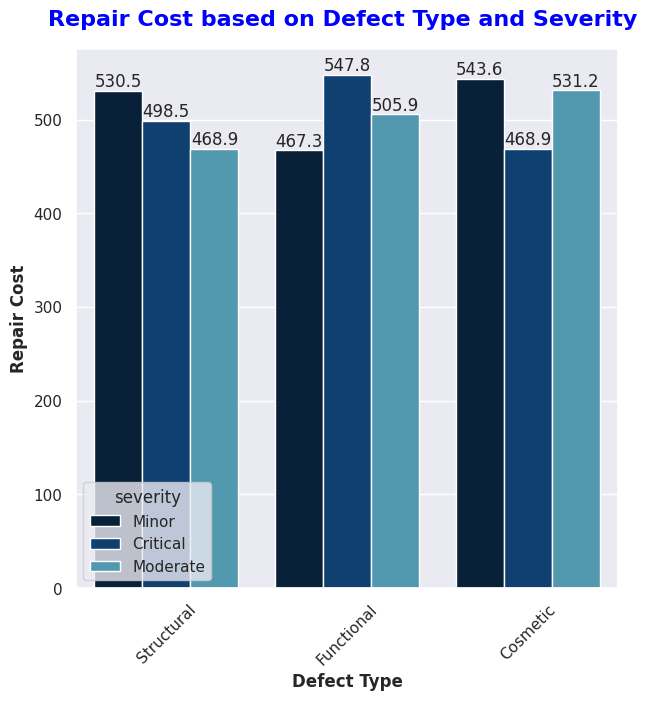

In [16]:
plt.figure(figsize=(7,7))
sns.set_style("darkgrid")

ax=sns.barplot(defects_df,x=defects_df["defect_type"] , y=defects_df["repair_cost"],
               hue=defects_df["severity"] , errorbar = ('ci', False), palette="ocean")

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f')

plt.title("Repair Cost based on Defect Type and Severity ",fontweight="bold", fontsize=16 , color="blue" , pad=17)
plt.xlabel("Defect Type", fontweight="heavy")
plt.ylabel("Repair Cost", fontweight="heavy")
plt.xticks(rotation=45)
plt.show()

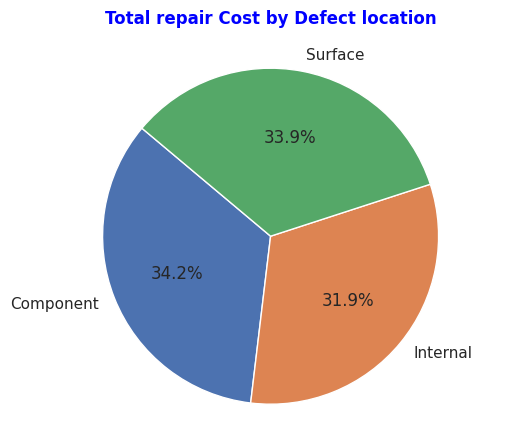

In [31]:

repair_sum_def_loc = defects_df.groupby("defect_location")["repair_cost"].sum()


repair_sum_df = repair_sum_def_loc.reset_index()


plt.plot(figsize=(5, 5))

plt.pie(repair_sum_def_loc, labels=repair_sum_def_loc.index, autopct='%1.1f%%', startangle=140 )
plt.title("Total repair Cost by Defect location" , pad=20, fontweight="bold", color="blue")
plt.axis('equal')
plt.show()


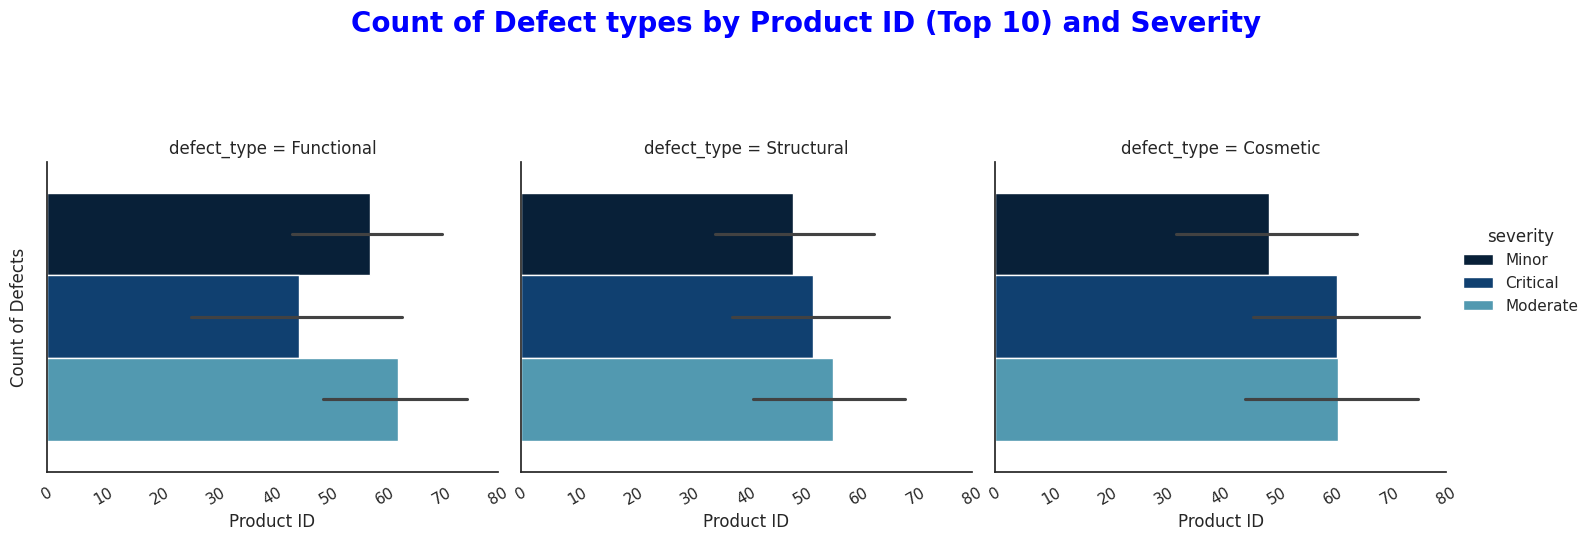

In [32]:
top_10_product_ids = defects_df["product_id"].value_counts().nlargest(10).index

top_10_df = defects_df[defects_df["product_id"].isin(top_10_product_ids)]

sns.set("notebook")
sns.set_style("white")
g = sns.catplot(data=top_10_df, x="product_id", hue="severity", col="defect_type", kind="bar", palette="ocean", height=4, aspect=1.2 , col_wrap=3)

plt.subplots_adjust(top=0.95)
g.fig.suptitle("Count of Defect types by Product ID (Top 10) and Severity", y=1.33, fontweight="bold", fontsize=20, color="blue")
g.set_axis_labels("Product ID", "Count of Defects")
g.set_xticklabels(rotation=30)


plt.show()

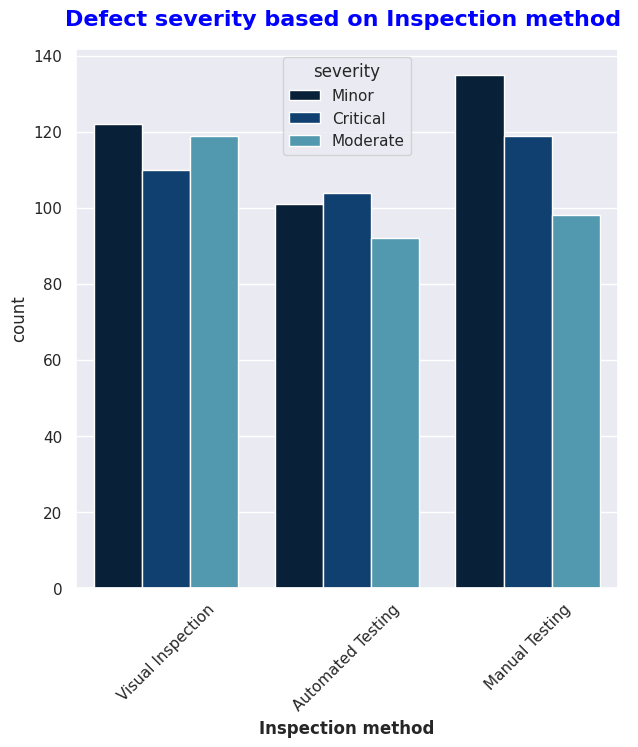

In [33]:
plt.figure(figsize=(7,7))
sns.set_style("darkgrid")

ax=sns.countplot(defects_df,x=defects_df["inspection_method"] , hue=defects_df["severity"],
                palette="ocean")



plt.title("Defect severity based on Inspection method ",fontweight="bold", fontsize=16 , color="blue" , pad=17)
plt.xlabel("Inspection method", fontweight="heavy")
plt.xticks(rotation=45)
plt.show()